# Sensor Component Failure Prediction

## 1) Problem Statement.

**Data:** Sensor Data

**Problem Statement:**
- The system in focus is the Air Pressure System(APS) which generates pressurized air that are utilized in various functions in a truck like braking and gear changes. The datasets positive class corresponds to failure of specific component of the APS. The negative class corresponds to failure of components not related to APS .
- The goal is to reduce the cost due to unnecessary repairs, so false predication has to be reduced.

|True class | Positive | Negative | |
| ----------- | ----------- |   |  |
|<b>Predicted class</b>||| |
| Positive      |   -       | cost_1  |    |
| Negative   | cost_2        |  | |


Cost 1 = 10 and Cost 2 = 500

- The total cost of a prediction model is the sum of `Cost_1` multiplied by the number of instances with type 1 failure and `Cost_2` with the number of instances with type 2 failure, resulting in a `Total_cost`. In this case `Cost_1` refers to the cost that an unnessecary check needs to be done by a mechanic at a workshop, while `Cost_2` refers to the cost of missing to predict a faulty truck, which may cause breakdown. 
- `Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.`

- From the above we can observe that, we have to reduce false positives and false negatives. More importantly we have to **reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.**

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


2) Important required libraries

In [22]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

Read Data

In [5]:
#Load csv file
df = pd.read_csv('aps_failure_training_set1.csv', na_values='na')

In [6]:
#check head of dataset
df.head

<bound method NDFrame.head of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       pos  153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0   
1       pos  453236     NaN  2.926000e+03     NaN     0.0     0.0     0.0   
2       pos   72504     NaN  1.594000e+03  1052.0     0.0     0.0     0.0   
3       pos  762958     NaN           NaN     NaN     NaN     NaN   776.0   
4       pos  695994     NaN           NaN     NaN     NaN     NaN     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
36183   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
36184   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
36185   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
36186   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
36187   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

         ag_001     ag_002  ...     ee_002   

In [7]:
#Check unique values of target variable
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [8]:
#Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
categorical_features = [feature for feature in df.columns if df[feature].dtype == '0']

# print columns
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')


We have 171 numerical features: ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 

As this is a Sensor Data, interpretation of the data is not required.

Checking missing values

<function matplotlib.pyplot.show(close=None, block=None)>

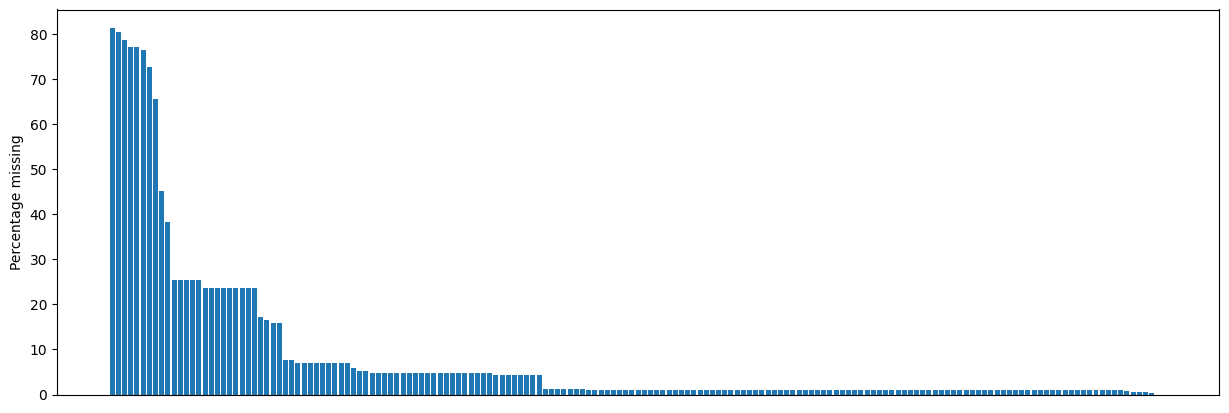

In [9]:
#Plotting Missing values count for each columns
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])

plt.xticks([])
plt.ylabel('Percentage missing')
plt.show

Dropping columns which has more than 70% missing values

In [10]:
## Dropping columns which has more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [11]:
df.drop(list(dropcols.index), axis=1, inplace=True)

Shape of dataset after dropping columns

In [12]:
df.shape

(36188, 164)

In [13]:
# percentage of missing data
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print(f'Percentage of total missing cells in the data {(total_missing/total_cells)*100}%')

Percentage of total missing cells in the data 5.37059852747306%


## Visualization of unique values in the target variable

Positive: 1000, Negative: 35188


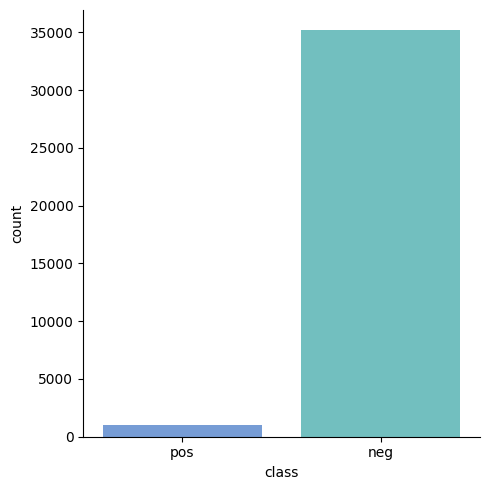

In [14]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print(f'Positive: {pos}, Negative: {neg}')

sns.catplot(data=df, x='class', kind='count', palette='winter', alpha=.6)
plt.show()

**Report**
- The target classes are highly impbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.

**How to handle Imbalance Data ?**
- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

## Create Functions for model training and evaluation

In [15]:
def evalute_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted) # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) # Calculate Roc
    return acc, f1, precision, recall, roc_auc    

In [16]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_true and y_predict and prints total cost due to misclassification
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [17]:
# Create a funstion which can evaluate models and return a report

def evaluate_models(X, y, models):
    '''
    This function takes X, y and models as input.
    It splits the data into Train and Test.
    It iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe containing report of all models metrics with cost
    '''
    # seperate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    cost_list = []
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        #Training set performance
        model_train_accuracy, model_train_f1, model_train_precision,\
        model_train_recall, model_train_rocauc_score = evalute_clf(y_train, y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)

        #Test set performance
        model_test_accuracy, model_test_f1, model_test_precision,\
        model_test_recall, model_test_rocauc_score = evalute_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print(f'- Accuracy: {model_train_accuracy:.4f}')
        print(f'- F1 score: {model_train_f1:.4f}')
        print(f'- Precision: {model_train_precision:.4f}')
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=['Cost'])

    return report

Plot distribution of all Independent Numerical variables

/tmp/ipykernel_657/882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
/tmp/ipykernel_657/882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
/tmp/ipykernel_657/882928629.py:6: UserWarning: 

`distplot` is a deprecat

KeyboardInterrupt: 

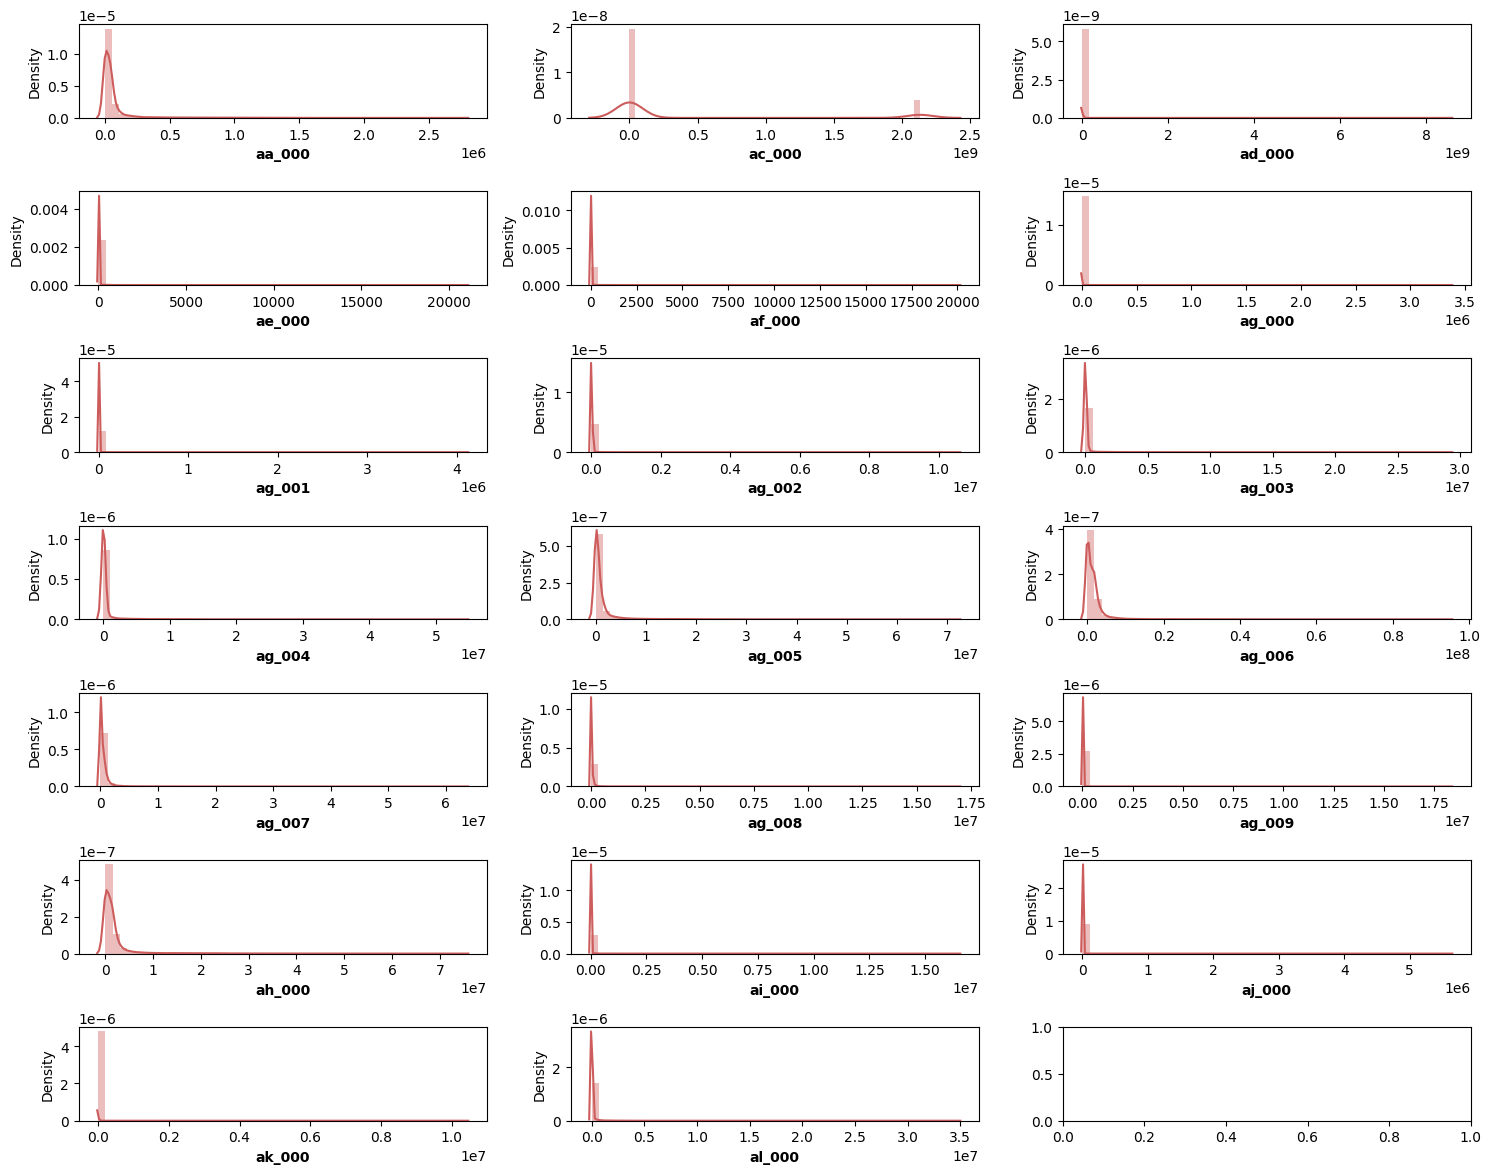

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

Report
- As per the above plot most of the features are not normally distributed
- Transformation of data is not of primary importance as it is a classification problem
- Interpreting each and every column is not necessary as this is sensor data

## Evaluate model on different experiments ##

In [19]:
# Splitting X and y for all Experiments
X = df.drop('class', axis=1)
y = df['class']

Manually Encoding Target Variable

In [20]:
y = y.replace({'pos':1, 'neg':0})

Feature scaling

Why Robust scaler and not standard scalar
- Since most of the independent variables are not normaly distributed, standard scalar cannot be used

Why robust scalar and not Minmax?
- As most of the features has outliers, Minmax will scale data according to Min Max values which might be outliers
- Robust Scaler removes the median and scales the data according to the quantile range(defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile(25th quantile) and the 3rd quantile(75th quantile)

In [23]:
# Fit with robust scaler for KNN best k-selection experiment
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

Experiment: 1 = KNN Imputer for Null values
Why KNN Imputer
- KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques
- KNNImputer helps to impute missing values present in the observations by finding the nearest neighbours with the Euclidean distance matrix
- Here we iterate through different K values and get accuracy and chose best K values

**Finding the optimum n_neighbour value for KNN imputer**